# Analyzing the results for `sciplex_hparam` with `grover` and `rdkit` sweeps

This is preliminary to the `fintuning_num_genes` and `finetuning_OOD_prediction` experiments. We look at the results of sweeping the optimisation related hyperparameters for fine-tuning on the sciplex dataset for all other embeddings.

In [1]:
import math
from pathlib import Path

import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import seml
from matplotlib import pyplot as plt
from compert.paths import FIGURE_DIR

matplotlib.style.use("fivethirtyeight")
matplotlib.style.use("seaborn-talk")
matplotlib.rcParams['font.family'] = "monospace"
plt.rcParams['savefig.facecolor'] = 'white'
sns.set_context("poster")
pd.set_option('display.max_columns', 100)

In [2]:
results = seml.get_results(
    "sciplex_hparam",
    to_data_frame=True,
    fields=["config", "result", "seml", "config_hash"],
    states=["COMPLETED"],
    filter_dict={
        # 'batch_id': 3,
        'config.dataset.data_params.split_key': 'split_ho_pathway'
    }

)

  0%|          | 0/316 [00:00<?, ?it/s]

  0%|          | 0/316 [00:00<?, ?it/s]

/home/icb/leon.hetzel/miniconda3/envs/chemical_CPA/lib/python3.7/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [3]:
# Look at number of experiments per model
results["config.model.embedding.model"].value_counts()

rdkit          120
grover_base    117
jtvae           20
MPNN            20
vanilla         20
seq2seq         19
Name: config.model.embedding.model, dtype: int64

In [4]:
results.loc[:, [c for c in results.columns if 'pretrain' in c]]

,config.model.load_pretrained,config.model.pretrained_model_hashes.GCN,config.model.pretrained_model_hashes.MPNN,config.model.pretrained_model_hashes.grover_base,config.model.pretrained_model_hashes.jtvae,config.model.pretrained_model_hashes.rdkit,config.model.pretrained_model_hashes.seq2seq,config.model.pretrained_model_hashes.vanilla,config.model.pretrained_model_hashes.weave,config.model.pretrained_model_path
0,True,aedb25c686fb856e574a951f749b8dcf,ff9629a1b216372be8b205556cabc6fb,ff420aea264fca7668ecb147f60762a1,a7060ac4e2c6154e64a13acd414cbba2,4f061dbfc7af05cf84f06a724b0c8563,e31119adc782888d5b75c57f8c803ee0,ba3569d1f5898a6bb964b7fafbed2641,1244d8b476696a7e1c01fd05d73d7450,/storage/groups/ml01/projects/2021_chemicalCPA...
1,True,aedb25c686fb856e574a951f749b8dcf,ff9629a1b216372be8b205556cabc6fb,ff420aea264fca7668ecb147f60762a1,a7060ac4e2c6154e64a13acd414cbba2,4f061dbfc7af05cf84f06a724b0c8563,e31119adc782888d5b75c57f8c803ee0,ba3569d1f5898a6bb964b7fafbed2641,1244d8b476696a7e1c01fd05d73d7450,/storage/groups/ml01/projects/2021_chemicalCPA...
2,True,aedb25c686fb856e574a951f749b8dcf,ff9629a1b216372be8b205556cabc6fb,ff420aea264fca7668ecb147f60762a1,a7060ac4e2c6154e64a13acd414cbba2,4f061dbfc7af05cf84f06a724b0c8563,e31119adc782888d5b75c57f8c803ee0,ba3569d1f5898a6bb964b7fafbed2641,1244d8b476696a7e1c01fd05d73d7450,/storage/groups/ml01/projects/2021_chemicalCPA...
3,True,aedb25c686fb856e574a951f749b8dcf,ff9629a1b216372be8b205556cabc6fb,ff420aea264fca7668ecb147f60762a1,a7060ac4e2c6154e64a13acd414cbba2,4f061dbfc7af05cf84f06a724b0c8563,e31119adc782888d5b75c57f8c803ee0,ba3569d1f5898a6bb964b7fafbed2641,1244d8b476696a7e1c01fd05d73d7450,/storage/groups/ml01/projects/2021_chemicalCPA...
4,True,aedb25c686fb856e574a951f749b8dcf,ff9629a1b216372be8b205556cabc6fb,ff420aea264fca7668ecb147f60762a1,a7060ac4e2c6154e64a13acd414cbba2,4f061dbfc7af05cf84f06a724b0c8563,e31119adc782888d5b75c57f8c803ee0,ba3569d1f5898a6bb964b7fafbed2641,1244d8b476696a7e1c01fd05d73d7450,/storage/groups/ml01/projects/2021_chemicalCPA...
...,...,...,...,...,...,...,...,...,...,...
311,False,NaN,NaN,ff420aea264fca7668ecb147f60762a1,NaN,4f061dbfc7af05cf84f06a724b0c8563,NaN,NaN,NaN,/storage/groups/ml01/projects/2021_chemicalCPA...
312,False,NaN,NaN,ff420aea264fca7668ecb147f60762a1,NaN,4f061dbfc7af05cf84f06a724b0c8563,NaN,NaN,NaN,/storage/groups/ml01/projects/2021_chemicalCPA...
313,False,NaN,NaN,ff420aea264fca7668ecb147f60762a1,NaN,4f061dbfc7af05cf84f06a724b0c8563,NaN,NaN,NaN,/storage/groups/ml01/projects/2021_chemicalCPA...
314,False,NaN,NaN,ff420aea264fca7668ecb147f60762a1,NaN,4f061dbfc7af05cf84f06a724b0c8563,NaN,NaN,NaN,/storage/groups/ml01/projects/2021_chemicalCPA...


In [5]:
pd.crosstab(
    results['config.model.embedding.model'],
    results['result.perturbation disentanglement'].isnull()
)

result.perturbation disentanglement,False
config.model.embedding.model,
MPNN,20
grover_base,117
jtvae,20
rdkit,120
seq2seq,19
vanilla,20


In [6]:
[c for c in results.columns if 'split' in c]

['config.dataset.data_params.split_key']

In [7]:
pd.crosstab(
    results['config.dataset.data_params.split_key'],
    results['result.perturbation disentanglement'].isnull()
)

result.perturbation disentanglement,False
config.dataset.data_params.split_key,
split_ho_pathway,316


In [8]:
pd.crosstab(
    results['config.dataset.data_params.split_key'],
    results['result.loss_reconstruction'].isnull()
)

result.loss_reconstruction,False
config.dataset.data_params.split_key,
split_ho_pathway,316


In [9]:
# columns
results.isnull().any()[results.isnull().any()]

config.model.embedding.directory                True
config.model.pretrained_model_hashes.GCN        True
config.model.pretrained_model_hashes.MPNN       True
config.model.pretrained_model_hashes.jtvae      True
config.model.pretrained_model_hashes.seq2seq    True
config.model.pretrained_model_hashes.vanilla    True
config.model.pretrained_model_hashes.weave      True
result.training_single_loss                     True
result.test_single_loss                         True
result.ood_single_loss                          True
config.model.append_ae_layer                    True
result.training_sc                              True
result.test_sc                                  True
result.ood_sc                                   True
dtype: bool

In [10]:
# rows without nans 
clean_id = results.loc[~results['result.training'].isnull(), '_id']
# clean_id

## Preprocessing the results dataframe

In [11]:
sweeped_params = [
    # "model.hparams.dim",
    # "model.hparams.dropout",
    # "model.hparams.dosers_width",
    # "model.hparams.dosers_depth",
    "model.hparams.dosers_lr",
    "model.hparams.dosers_wd",
    # "model.hparams.autoencoder_width",
    # "model.hparams.autoencoder_depth",
    "model.hparams.autoencoder_lr",
    "model.hparams.autoencoder_wd",
    "model.hparams.adversary_width",
    "model.hparams.adversary_depth",
    "model.hparams.adversary_lr",
    "model.hparams.adversary_wd",
    "model.hparams.adversary_steps",
    "model.hparams.reg_adversary",
    "model.hparams.penalty_adversary",
    "model.hparams.batch_size",
    "model.hparams.step_size_lr",
    # "model.hparams.embedding_encoder_width",
    # "model.hparams.embedding_encoder_depth",
]

In [12]:
# percentage of training runs that resulted in NaNs or totally failed

results_clean = results[results._id.isin(clean_id)].copy()
print(f"Percentage of invalid (nan) runs: {1 - len(clean_id) / len(results)}")

# Remove runs with r2 < 0.6 on the training set
# results_clean = results_clean[results_clean['result.training'].apply(lambda x: x[0][0])>0.6]

Percentage of invalid (nan) runs: 0.0


In [13]:
results_clean["config.model.embedding.model"].value_counts()

rdkit          120
grover_base    117
jtvae           20
MPNN            20
vanilla         20
seq2seq         19
Name: config.model.embedding.model, dtype: int64

In [14]:
# calculate some stats
get_mean = lambda x: np.array(x)[-1, 0]
get_mean_de = lambda x: np.array(x)[-1, 1]

results_clean["result.training_mean"] = results_clean["result.training"].apply(get_mean)
results_clean["result.training_mean_de"] = results_clean["result.training"].apply(get_mean_de)
results_clean["result.val_mean"] = results_clean["result.test"].apply(get_mean)
results_clean["result.val_mean_de"] = results_clean["result.test"].apply(get_mean_de)
results_clean["result.test_mean"] = results_clean["result.ood"].apply(get_mean)
results_clean["result.test_mean_de"] = results_clean["result.ood"].apply(get_mean_de)
results_clean["result.perturbation disentanglement"] = results_clean["result.perturbation disentanglement"].apply(lambda x: x[0])
results_clean["result.covariate disentanglement"] = results_clean["result.covariate disentanglement"].apply(lambda x: x[0][0])
results_clean["result.final_reconstruction"] = results_clean["result.loss_reconstruction"].apply(lambda x: x[-1])

results_clean.head(3)

,_id,config_hash,seml.executable,seml.name,seml.output_dir,seml.conda_environment,seml.working_dir,seml.source_files,seml.output_file,seml.command,seml.temp_dir,config.overwrite,config.db_collection,config.dataset.data_params.covariate_keys,config.dataset.data_params.dataset_path,config.dataset.data_params.degs_key,config.dataset.data_params.dose_key,config.dataset.data_params.pert_category,config.dataset.data_params.perturbation_key,config.dataset.data_params.smiles_key,config.dataset.data_params.split_key,config.dataset.data_params.use_drugs_idx,config.dataset.dataset_type,config.model.additional_params.decoder_activation,config.model.additional_params.doser_type,config.model.additional_params.patience,config.model.additional_params.seed,config.model.embedding.directory,config.model.embedding.model,config.model.hparams.adversary_depth,config.model.hparams.adversary_lr,config.model.hparams.adversary_steps,config.model.hparams.adversary_wd,config.model.hparams.adversary_width,config.model.hparams.autoencoder_depth,config.model.hparams.autoencoder_lr,config.model.hparams.autoencoder_wd,config.model.hparams.autoencoder_width,config.model.hparams.batch_size,config.model.hparams.dim,config.model.hparams.dosers_depth,config.model.hparams.dosers_lr,config.model.hparams.dosers_wd,config.model.hparams.dosers_width,config.model.hparams.dropout,config.model.hparams.embedding_encoder_depth,config.model.hparams.embedding_encoder_width,config.model.hparams.penalty_adversary,config.model.hparams.reg_adversary,config.model.hparams.step_size_lr,config.model.load_pretrained,config.model.pretrained_model_hashes.GCN,config.model.pretrained_model_hashes.MPNN,config.model.pretrained_model_hashes.grover_base,config.model.pretrained_model_hashes.jtvae,config.model.pretrained_model_hashes.rdkit,config.model.pretrained_model_hashes.seq2seq,config.model.pretrained_model_hashes.vanilla,config.model.pretrained_model_hashes.weave,config.model.pretrained_model_path,config.profiling.outdir,config.profiling.run_profiler,config.training.checkpoint_freq,config.training.full_eval_during_train,config.training.max_minutes,config.training.num_epochs,config.training.run_eval_disentangle,config.training.save_checkpoints,config.training.save_dir,config.seed,result.epoch,result.stats_epoch,result.loss_reconstruction,result.loss_adv_drugs,result.loss_adv_covariates,result.penalty_adv_drugs,result.penalty_adv_covariates,result.elapsed_time_min,result.training,result.test,result.ood,result.perturbation disentanglement,result.optimal for perturbations,result.covariate disentanglement,result.optimal for covariates,result.total_epochs,result.training_single_loss,result.test_single_loss,result.ood_single_loss,config.model.append_ae_layer,result.training_sc,result.test_sc,result.ood_sc,result.training_mean,result.training_mean_de,result.val_mean,result.val_mean_de,result.test_mean,result.test_mean_de,result.final_reconstruction
0,1,4a9fb39bf40129dde628a487b0b56543,compert/seml_sweep_icb.py,ft_sciplex_hparam,/mnt/home/icb/leon.hetzel/git/CPA_graphs/sweep...,chemical_CPA,/mnt/home/icb/leon.hetzel/git/CPA_graphs,"[[compert/seml_sweep_icb.py, 61f0039e497dd9b7c...",/mnt/home/icb/leon.hetzel/git/CPA_graphs/sweep...,python compert/seml_sweep_icb.py with 'model={...,/tmp/780ffe89-04aa-4714-a620-203e36a7807f,1,sciplex_hparam,cell_type,/storage/groups/ml01/projects/2021_chemicalCPA...,lincs_DEGs,dose,cov_drug_dose_name,condition,SMILES,split_ho_pathway,True,trapnell,linear,amortized,4,1337,None,rdkit,2,0.000364,3,7.459343e-07,128,4,0.000561,1.329292e-07,256,64,32,3,0.000561,1.329292e-07,64,0.262378,4,128,2.368864,15.355287,50,True,aedb25c686fb856e574a951f749b8dcf,ff9629a1b216372be8b205556cabc6fb,ff420aea264fca7668ecb147f60762a1,a7060ac4e2c6154e64a13acd414cbba2,4f061dbfc7af05cf84f06a724b0c8563,e31119adc782888d5b75c57f8c803ee0,ba3569d1f5898a6bb964b7fafbed2641,1244d8b476696a7e1c01fd05d73d7450,/storage/groups/ml01/projects/2021_chemicalCPA...,./,False,15,False,1200,1500,True,True,/storage/

In [15]:
# results_clean["config.model.load_pretrained"]

## Look at early stopping

Text(0.5, 1.0, 'Total epochs before final stopping (min 125)')

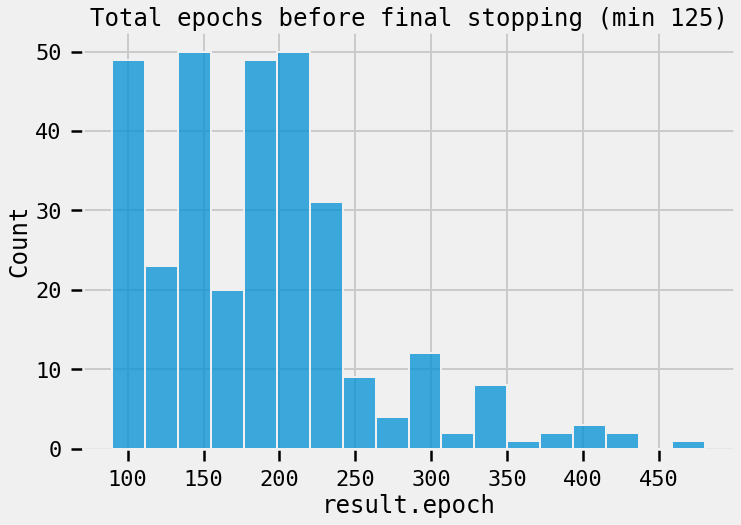

In [16]:
ax = sns.histplot(data=results_clean["result.epoch"].apply(max))
ax.set_title("Total epochs before final stopping (min 125)")

## Look at $r^2$ reconstruction

In [17]:
[c for c in results_clean.columns if 'pretrain' in c]

results_clean[["config.model.embedding.model", 'config.model.load_pretrained']]

,config.model.embedding.model,config.model.load_pretrained
0,rdkit,True
1,rdkit,True
2,rdkit,True
3,rdkit,True
4,rdkit,True
...,...,...
311,grover_base,False
312,grover_base,False
313,grover_base,False
314,grover_base,False


### DE genes

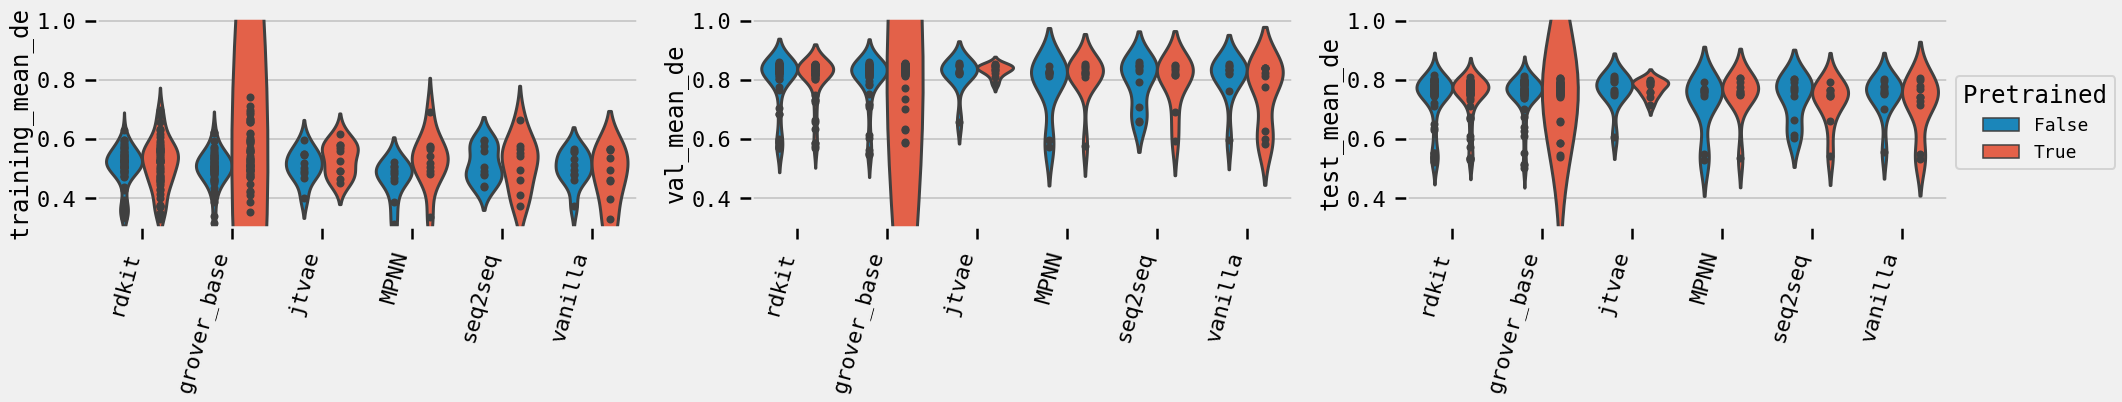

In [18]:
# DE genes
rows, cols = 1, 3
fig, ax = plt.subplots(rows, cols, figsize=(10*cols,6*rows))

for i, y in enumerate(("result.training_mean_de", "result.val_mean_de", "result.test_mean_de")):
    sns.violinplot(
        data=results_clean, 
        x="config.model.embedding.model", 
        y=y, 
        hue='config.model.load_pretrained', 
        inner='points', 
        ax=ax[i], 
        scale='width',
        )
    ax[i].set_ylim([0.3,1.01])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=75, ha='right')
    ax[i].set_xlabel('')
    ax[i].set_ylabel(y.split('.')[-1])
    ax[i].legend(title='Pretrained',loc='lower right', fontsize=18, title_fontsize=24)

ax[0].get_legend().remove()
ax[1].get_legend().remove()
ax[2].legend(title='Pretrained', fontsize=18, title_fontsize=24, loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()

### All genes

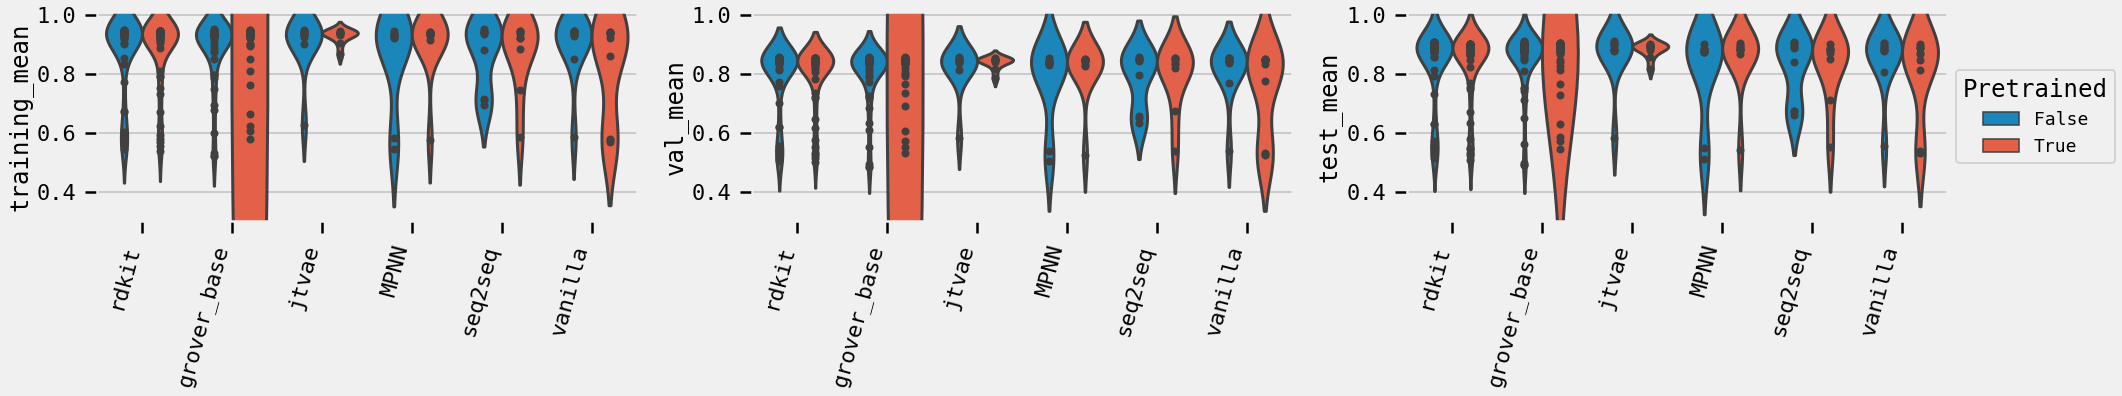

In [19]:
# DE genes
rows, cols = 1, 3
fig, ax = plt.subplots(rows, cols, figsize=(10*cols,6*rows))

for i, y in enumerate(("result.training_mean", "result.val_mean", "result.test_mean")):
    sns.violinplot(
        data=results_clean, 
        x="config.model.embedding.model", 
        y=y, 
        hue='config.model.load_pretrained', 
        inner='points', 
        ax=ax[i], 
        scale='width',
        )
    ax[i].set_ylim([0.3,1.01])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=75, ha='right')
    ax[i].set_xlabel('')
    ax[i].set_ylabel(y.split('.')[-1])
    ax[i].legend(title='Pretrained',loc='lower right', fontsize=18, title_fontsize=24)

ax[0].get_legend().remove()
ax[1].get_legend().remove()
ax[2].legend(title='Pretrained', fontsize=18, title_fontsize=24, loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()

## Look at disentanglement scores

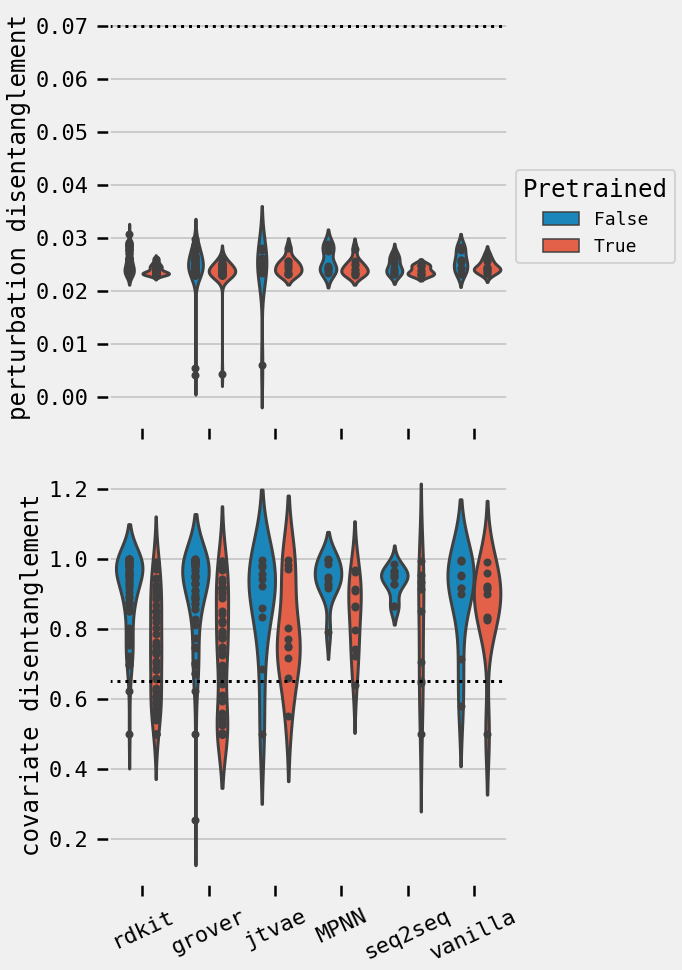

In [20]:
rows = 2 
cols = 1
fig, ax = plt.subplots(rows, cols, figsize=(10*cols, 7*rows), sharex=True)

max_entangle = [0.07, 0.65]
for i, y in enumerate(["result.perturbation disentanglement", "result.covariate disentanglement"]):
    sns.violinplot(data=results_clean, x="config.model.embedding.model", y=y, inner='point' ,ax=ax[i], hue='config.model.load_pretrained')
    # ax[i].set_ylim([0,1])
    x_ticks = ax[i].get_xticklabels()
    [x_tick.set_text(x_tick.get_text().split("_")[0]) for x_tick in x_ticks]
    ax[i].set_xticklabels(x_ticks, rotation=25, ha='center')
    ax[i].axhline(max_entangle[i],ls=":", color='black')
    ax[i].set_xlabel('')
    ax[i].set_ylabel(y.split('.')[-1])
ax[1].get_legend().remove()
ax[0].legend(title='Pretrained', fontsize=18, title_fontsize=24, loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()

## Subselect to disentangled models

In [21]:
n_top = 2

def performance_condition (emb, pretrained, max_entangle, max_entangle_cov): 
    cond = (results_clean["config.model.embedding.model"] == emb) 
    cond = cond & (results_clean["result.perturbation disentanglement"] < max_entangle) 
    cond = cond & (results_clean["config.model.load_pretrained"] == pretrained)
    cond = cond & (results_clean["result.covariate disentanglement"] < max_entangle_cov)
    return cond 

best = []
for embedding in list(results_clean["config.model.embedding.model"].unique()):
    for pretrained in [True, False]:
        df = results_clean[performance_condition(embedding, pretrained, max_entangle[0], max_entangle[1])]
        print(embedding, pretrained, len(df))
        # if len(df) == 0: 
        #     df = results_clean[performance_condition(embedding, pretrained, max_entangle[0], max_entangle[1]+0.05)]
        #     if len(df) == 0: 
        #         df = results_clean[performance_condition(embedding, pretrained, max_entangle[0], max_entangle[1]+0.2)]
        #         if len(df) == 0: 
        #             df = results_clean[performance_condition(embedding, pretrained, max_entangle[0], max_entangle[1]+0.3)]
        if not pretrained and len(df) == 0: 
            best = best[:-1]   # delete previous run
        best.append(df.sort_values(by="result.val_mean_de", ascending=False).head(n_top))

best = pd.concat(best)

rdkit True 18
rdkit False 2
grover_base True 20
grover_base False 3
jtvae True 1
jtvae False 1
MPNN True 1
MPNN False 0
seq2seq True 3
seq2seq False 0
vanilla True 1
vanilla False 1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


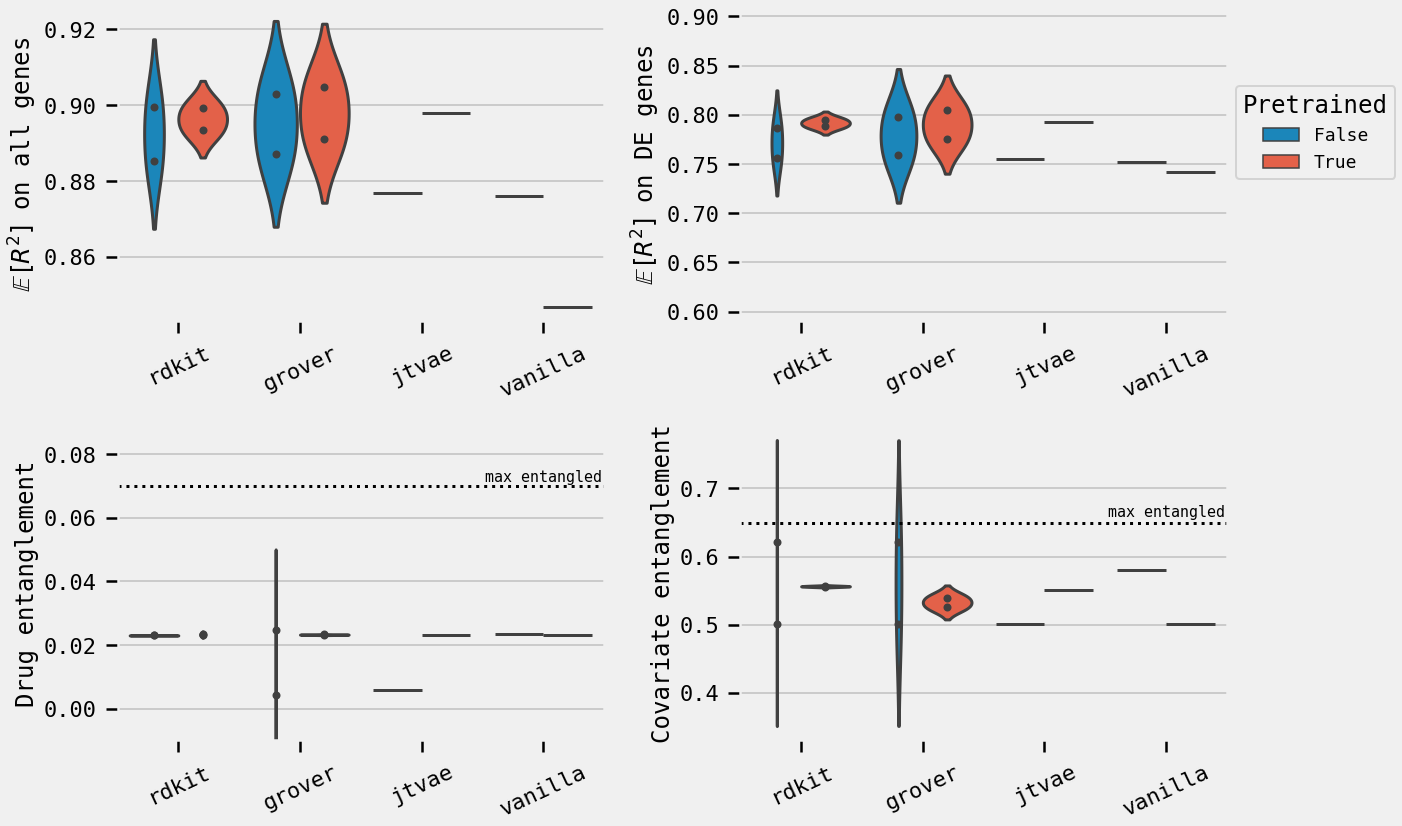

In [25]:
# All genes, DE genes, disentanglement
rows, cols = 2, 2
fig, ax = plt.subplots(rows, cols, figsize=(10*cols,6*rows))

for i, y in enumerate(["result.test_mean", "result.test_mean_de", "result.perturbation disentanglement", "result.covariate disentanglement"]):
    sns.violinplot(data=best, x="config.model.embedding.model", y=y, inner='points', ax=ax[i//cols, i%cols], scale='area', hue='config.model.load_pretrained')
    x_ticks = ax[i//cols, i%cols].get_xticklabels()
    [x_tick.set_text(x_tick.get_text().split("_")[0]) for x_tick in x_ticks]
    ax[i//cols, i%cols].set_xticklabels(x_ticks, rotation=25, ha='center')
    ax[i//cols, i%cols].set_xlabel('')
    ax[i//cols, i%cols].set_ylabel(y.split('.')[-1])
ax[0,0].set_ylabel("$\mathbb{E}\,[R^2]$ on all genes")
# ax[0,0].set_ylim([0.89, 0.96])
ax[0,1].set_ylabel("$\mathbb{E}\,[R^2]$ on DE genes")
ax[0,1].set_ylim([0.59,0.91])

ax[1,0].set_ylabel("Drug entanglement")
ax[1,0].axhline(max_entangle[0],ls=':' ,color='black')
ax[1,0].text(3.0, max_entangle[0]+0.003, 'max entangled', fontsize=15, va='center', ha='center')
ax[1,0].set_ylim([-0.01, 0.089])
ax[1,1].set_ylabel("Covariate entanglement")
ax[1,1].text(3.0, max_entangle[1]+0.015, 'max entangled', fontsize=15, va='center', ha='center')
ax[1,1].axhline(max_entangle[1], ls=':', color='black')

ax[0,0].get_legend().remove()
ax[1,0].get_legend().remove()
ax[1,1].get_legend().remove()
ax[0,1].legend(title='Pretrained', fontsize=18, title_fontsize=24, loc="center left", bbox_to_anchor=(1, 0.6))
plt.tight_layout()

split_keys = results_clean['config.dataset.data_params.split_key'].unique()
assert len(split_keys) == 1 
split_key = split_keys[0]

plt.savefig(FIGURE_DIR/f'sciplex_{split_key}_lincs_genes.eps', format='eps', bbox_inches='tight')


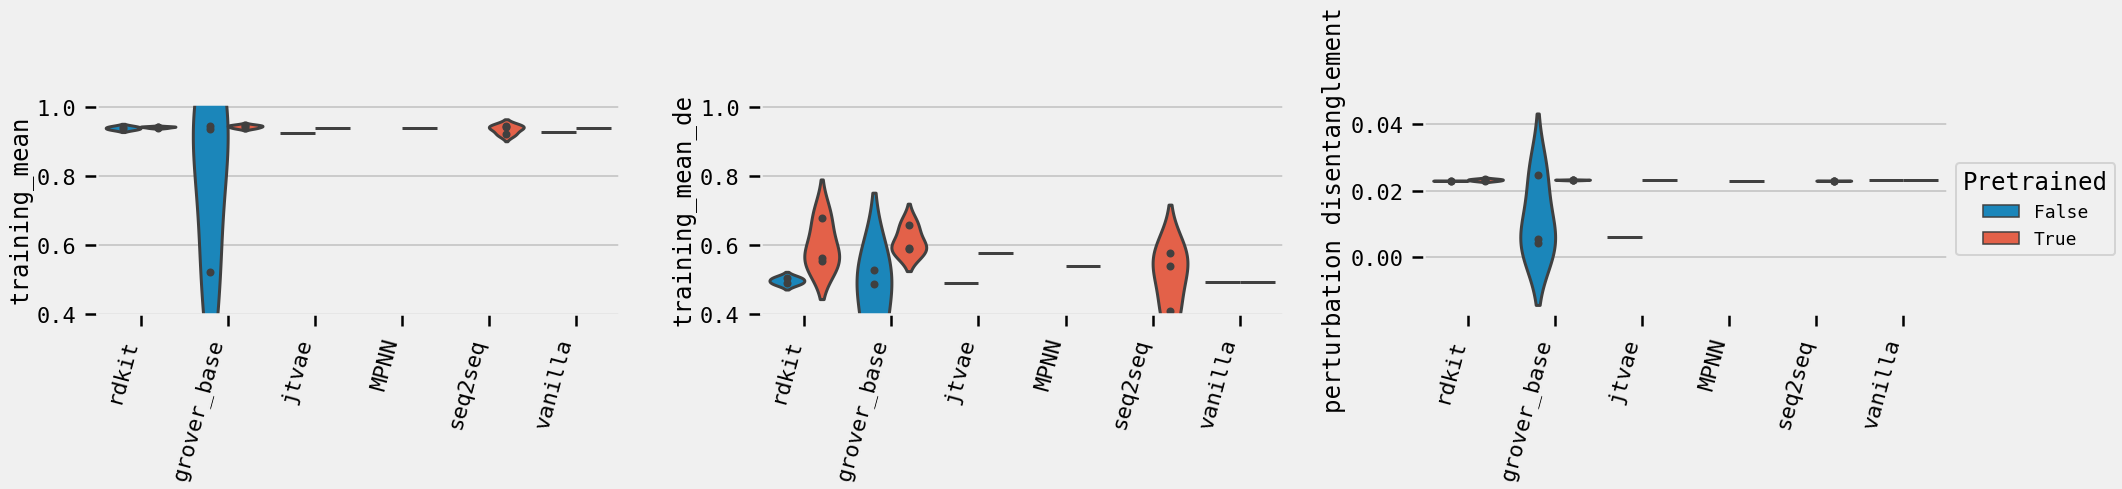

In [106]:
rows, cols = 1, 3
fig, ax = plt.subplots(rows, cols, figsize=(10*cols,6*rows))

for i, y in enumerate(["result.training_mean", "result.training_mean_de", "result.perturbation disentanglement"]):
    sns.violinplot(
        data=best, 
        x="config.model.embedding.model", 
        y=y, 
        hue='config.model.load_pretrained', 
        inner='points', 
        ax=ax[i], 
        scale='width',
        )
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=75, ha='right')
    ax[i].set_xlabel('')
    ax[i].set_ylabel(y.split('.')[-1])
ax[0].get_legend().remove()
ax[0].set_ylim([0.4, 1.01])
ax[1].get_legend().remove()
ax[1].set_ylim([0.4, 1.01])
ax[2].legend(title='Pretrained', fontsize=18, title_fontsize=24, loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()

## Take a deeper look in the `.config` of the best performing models

In [73]:
best[["config." + col for col in sweeped_params] +
     ["result.perturbation disentanglement", "result.test_mean", "result.test_mean_de"]]

,config.model.hparams.dosers_lr,config.model.hparams.dosers_wd,config.model.hparams.autoencoder_lr,config.model.hparams.autoencoder_wd,config.model.hparams.adversary_width,config.model.hparams.adversary_depth,config.model.hparams.adversary_lr,config.model.hparams.adversary_wd,config.model.hparams.adversary_steps,config.model.hparams.reg_adversary,config.model.hparams.penalty_adversary,config.model.hparams.batch_size,config.model.hparams.step_size_lr,result.perturbation disentanglement,result.test_mean,result.test_mean_de
145,0.000205,2.937538e-08,0.000205,2.937538e-08,64,2,0.000114,6.025216e-08,3,7.978542,0.716085,32,50,0.048704,0.817912,0.730136
40,0.000561,1.329292e-07,0.000561,1.329292e-07,256,4,0.000364,7.459343e-07,2,15.355287,0.072749,32,50,0.043585,0.829013,0.731478
80,0.000561,1.329292e-07,0.000561,1.329292e-07,128,4,0.000364,7.459343e-07,3,15.355287,1.184432,128,50,0.048660,0.864927,0.706155
52,0.002911,1.570297e-06,0.002911,1.570297e-06,256,4,0.002417,4.570563e-05,2,44.803927,0.483437,32,50,0.050044,0.838849,0.624427
57,0.005399,3.967605e-06,0.005399,3.967605e-06,128,2,0.004921,2.142302e-04,2,66.971674,0.984232,128,50,0.042443,0.833548,0.627310
97,0.002911,1.570297e-06,0.002911,1.570297e-06,256,2,0.002417,4.570563e-05,3,44.803927,2.697515,32,50,0.041718,0.829221,0.602306
66,0.000131,1.493657e-08,0.000131,1.493657e-08,128,2,0.000068,1.951722e-08,3,5.950295,0.013604,32,50,0.047627,0.865241,0.734642
63,0.001575,6.251374e-07,0.001575,6.251374e-07,128,2,0.001193,9.846739e-06,2,30.049874,0.238523,128,50,0.046156,0.860658,0.694952
115,0.000205,2.937538e-08,0.000205,2.937538e-08,128,3,0.000114,6.025216e-08,2,7.978542,0.716085,32,50,0.046309,0.850694,0.695050
132,0.005399,3.967605e-06,0.005399,3.967605e-06,256,4,0.004921,2.142302e-04,3,66.971674,3.674059,64,50,0.040444,0.828660,0.623559


'split_ood_finetuning'